# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# pd.merge(pd.DataFrame(cities), pd.DataFrame(lats), how='left')
cities_df = pd.DataFrame(cities)



Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    response = requests.get(city_url)
    city_weather = response.json()
    json_string = json.dumps(city_weather, indent=4)
    print(json_string)


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{
    "coord": {
        "lon": 91.3903,
        "lat": 53.6039
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 264.09,
        "feels_like": 257.09,
        "temp_min": 264.09,
        "temp_max": 264.09,
        "pressure": 1025,
        "humidity": 62,
        "sea_level": 1025,
        "grnd_level": 992
    },
    "visibility": 10000,
    "wind": {
        "speed": 6,
        "deg": 210
    },
    "clouds": {
        "all": 0
    },
    "dt": 1731463967,
    "sys": {
        "type": 1,
        "id": 8942,
        "country": "RU",
        "sunrise": 1731460618,
        "sunset": 1731492040
    },
    "timezone": 25200,
    "id": 1510377,
    "name": "Belyy Yar",
    "cod": 200
}
Processing Record 1 of Set 1 | belyy yar
{
    "coord": {
        "lon": 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belyy yar,53.6039,91.3903,264.09,62,0,6.00,RU,1731463967
1,shali,43.1481,45.9019,277.07,90,32,1.40,RU,1731463968
2,avarua,-21.2078,-159.7750,297.18,64,40,5.14,CK,1731463970
3,taro,-8.3862,115.2800,303.32,48,0,0.92,ID,1731463971
4,shagonar,51.5333,92.8000,265.72,55,68,2.08,RU,1731463972


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belyy yar,53.6039,91.3903,264.09,62,0,6.00,RU,1731463967
1,shali,43.1481,45.9019,277.07,90,32,1.40,RU,1731463968
2,avarua,-21.2078,-159.7750,297.18,64,40,5.14,CK,1731463970
3,taro,-8.3862,115.2800,303.32,48,0,0.92,ID,1731463971
4,shagonar,51.5333,92.8000,265.72,55,68,2.08,RU,1731463972


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

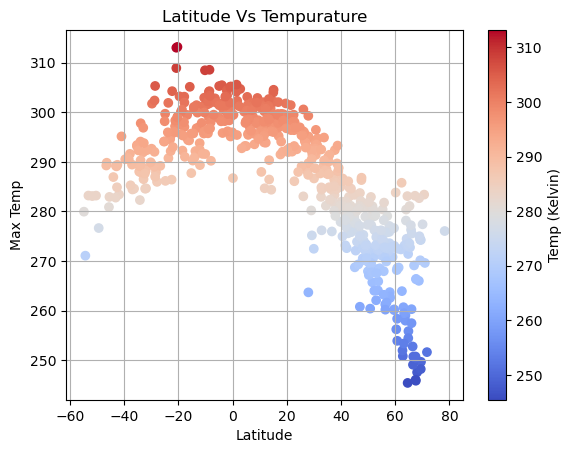

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c=city_data_df['Max Temp'], cmap='coolwarm')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude Vs Tempurature')

# Incorporate the other graph properties
cbar = plt.colorbar()
cbar.set_label('Temp (Kelvin)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

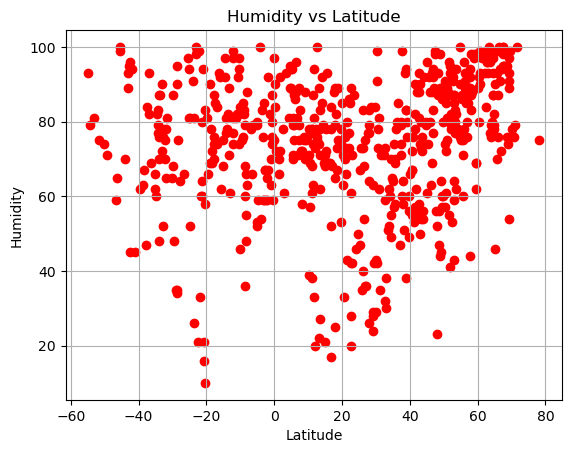

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='red')

# Incorporate the other graph properties
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity vs Latitude')
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

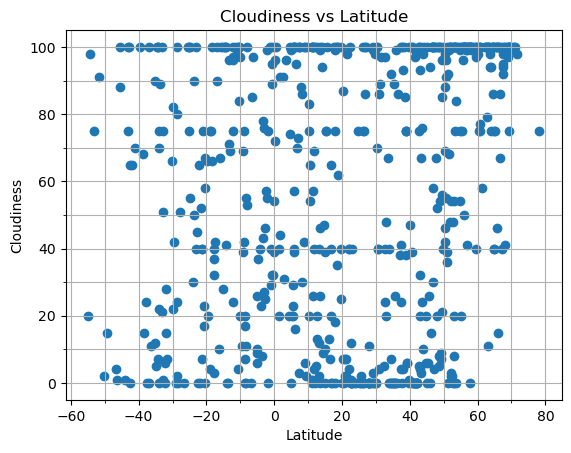

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')
plt.grid(True, which='both')
xticks = np.arange(-60,80,10)
plt.xticks(ticks=xticks, minor=True)
yticks = np.arange(0, 101, 10)
plt.yticks(ticks=yticks, minor=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

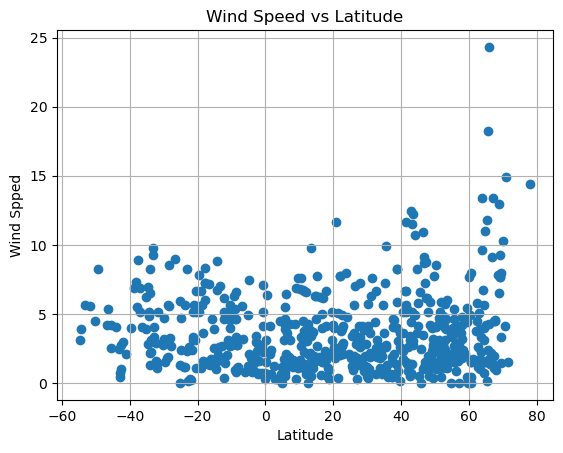

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Spped')
plt.title('Wind Speed vs Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
from scipy import stats

In [12]:
# Define a function to create Linear Regression plots
def myfunction(x_value, y_value):
  x_value = x_value
  y_value = y_value

  slope, intercept, r, p, std_err = stats.linregress(x_value, y_value)
  regress_values = x_value * slope + intercept
  line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
  r_squared = r**2
  return regress_values, line_equation, r_squared

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belyy yar,53.6039,91.3903,264.09,62,0,6.00,RU,1731463967
1,shali,43.1481,45.9019,277.07,90,32,1.40,RU,1731463968
4,shagonar,51.5333,92.8000,265.72,55,68,2.08,RU,1731463972
6,tralee,52.2704,-9.7026,279.03,82,2,1.44,IE,1731463975
9,caibarien,22.5206,-79.4669,299.52,89,12,4.91,CU,1731463979


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,297.18,64,40,5.14,CK,1731463970
3,taro,-8.3862,115.2800,303.32,48,0,0.92,ID,1731463971
5,imbituba,-28.2400,-48.6703,287.92,75,0,3.28,BR,1731463973
7,samarinda,-0.5000,117.1500,305.20,59,32,0.57,ID,1731463976
8,kendari,-3.9450,122.4989,305.47,54,23,0.80,ID,1731463977


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.754646647598692


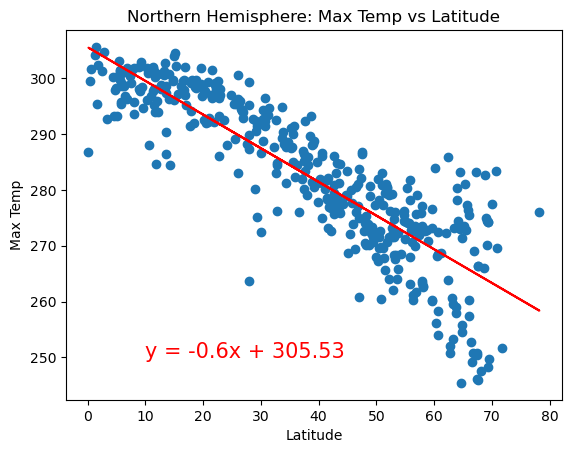

In [20]:
# Linear regression on Northern Hemisphere

#Locate the columns for plotting
lat = northern_hemi['Lat']
temp = northern_hemi['Max Temp']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(lat, temp)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Max Temp vs Latitude')
plt.plot(lat, regress_values, color='red')
plt.text(10, 250, line_equation, fontsize=15,color='red')
plt.show()

The r^2-value is: 0.48999868533325974


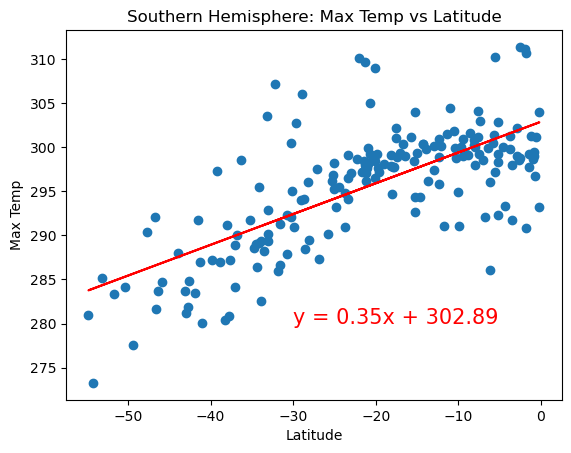

In [ ]:
# Linear regression on Southern Hemisphere

#Locate the columns for plotting
southern_lat = southern_hemi_df['Lat']
southern_temp = southern_hemi_df['Max Temp']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(southern_lat, southern_temp)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(southern_lat, southern_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Max Temp vs Latitude')
plt.text(-30, 280, line_equation, fontsize=15,color='red')
plt.plot(southern_lat, regress_values, color='red')
plt.show()


**Discussion about the linear relationship:**

Both the northern and southern hempisphere have max temps that are fairly reliant on the latitude.  This is observed in the northern hemisphere, where the r^2 value of ".75", indicates that 75% of plot point fall within the linear model.  In the southern hemisphere the r^2 value is much lower - about ".49". This indicates that a little less than half of plot points are within the linear model.  Additionally, this means there is more variance in tempurature in the Southern Hemisphere.   Based on these numbers, it can be assumed that the 'Max Temp' of the northern hemisphere will be easier to accurately predict than the southern hemisphere. 


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0792174927750927


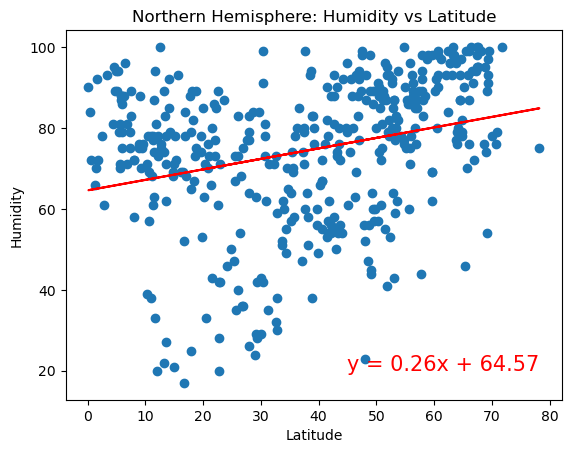

In [21]:
# Northern Hemisphere

#Locate the columns for plotting
northern_lat = northern_hemi_df['Lat']
northern_humidity = northern_hemi_df['Humidity']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(northern_lat, northern_humidity)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(northern_lat, northern_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs Latitude')
plt.plot(northern_lat, regress_values, color='red')
plt.text(45, 20, line_equation, fontsize=15,color='red')
plt.show()

The r^2-value is: 0.000726674864217279


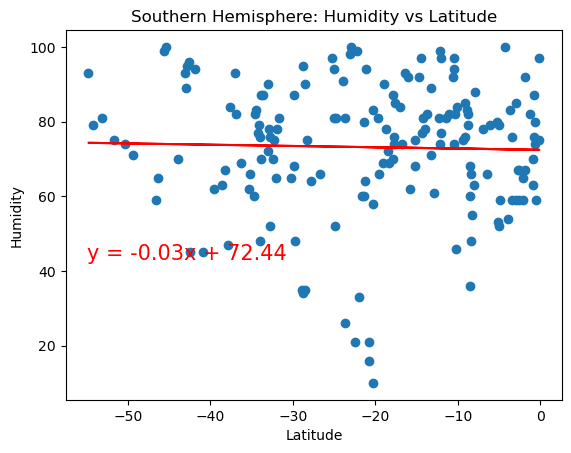

In [30]:
# Southern Hemisphere

# Locate the columns for plotting
southern_lat = southern_hemi_df['Lat']
southern_humdity = southern_hemi_df['Humidity']

# Use linear regression function
regress_values, line_equation, r_squared = myfunction(southern_lat, southern_humdity)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(southern_lat, southern_humdity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs Latitude')
plt.plot(southern_lat, regress_values, color='red')
plt.text(-55, 43, line_equation, fontsize=15, color='red')
plt.show()

**Discussion about the linear relationship:** 

Based on the linear model there appears to be some relationship between humidity and latitude, but a small relationship.  The r^2 value is low for both plots, meaning that some points can be predicated by the model but a majority won't.  

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.019449946056174557


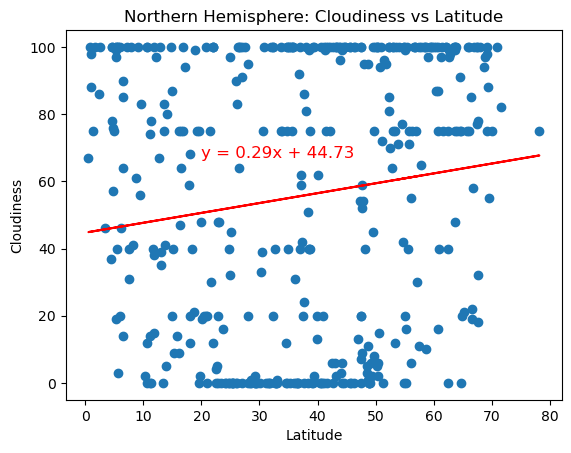

In [ ]:
# Northern Hemisphere

#Locate the columns for plotting
northern_lat = northern_hemi_df['Lat']
northern_cloudiness = northern_hemi_df['Cloudiness']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(northern_lat, northern_cloudiness)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(northern_lat, northern_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs Latitude')
plt.plot(northern_lat, regress_values, color='red')
plt.text(20, 67, line_equation, fontsize=12,color='red')
plt.show()

The r^2-value is: 0.0013047866244307405


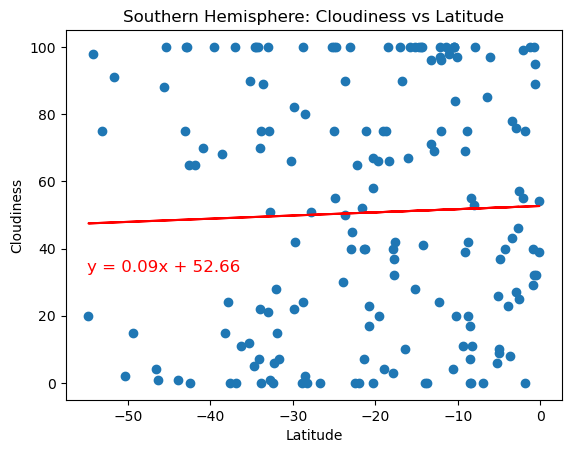

In [31]:
# Southern Hemisphere

#Locate the columns for plotting
south_lat = southern_hemi_df['Lat']
south_cloud = southern_hemi_df['Cloudiness']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(south_lat, south_cloud)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(south_lat, south_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs Latitude')
plt.plot(south_lat, regress_values, color='red')
plt.text(-55, 33, line_equation, fontsize=12,color='red')
plt.show()

**Discussion about the linear relationship:** 

Based on the linear models, it appears that the model may be a poor fit for the data. With both graphs having a lower r^2 value, it can be assumed that latitude does not have a strong impact on the outcome of cloudiness. Even with a visualization of the data on a scatter plot, it's apparent that the points are quite randomized with no clear pattern.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03802734231621533


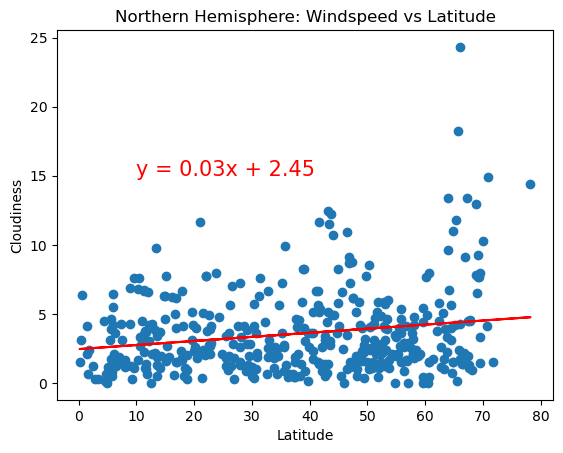

In [34]:
# Northern Hemisphere

#Locate the columns for plotting
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(north_lat, north_wind)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(north_lat, north_wind)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Windspeed vs Latitude')
plt.plot(north_lat, regress_values, color='red')
plt.text(10, 15, line_equation, fontsize=15,color='red')
plt.show()

The r^2-value is: 0.05839748562387393


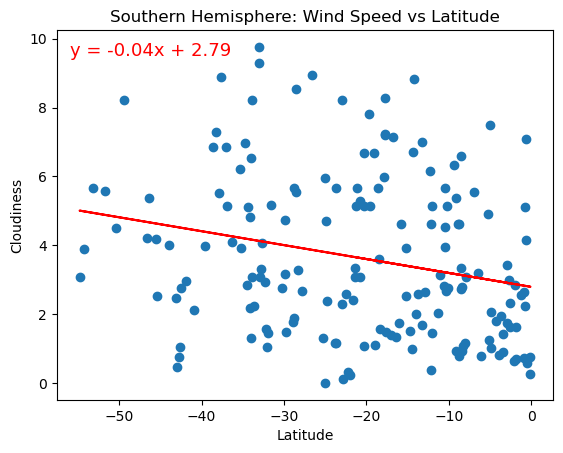

In [42]:
# Southern Hemisphere

#Locate the columns for plotting
south_lat
south_wind = southern_hemi_df['Wind Speed']

# Use linear regression function 
regress_values, line_equation, r_squared = myfunction(south_lat, south_wind)

#Print r^2 value
print(f"The r^2-value is: {r_squared}")

#Plot linear regression on scatter plot
plt.scatter(south_lat, south_wind)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Wind Speed vs Latitude')
plt.plot(south_lat, regress_values, color='red')
plt.text(-56, 9.5, line_equation, fontsize=13,color='red')
plt.show()

**Discussion about the linear relationship:** 

The windspeed appears to be unaffected by the changes latitude.  The r^2 value for both plots indicate that the linear model may be a poor fit.  However in the southern hemisphere the predicatble of windspeed may be much easier than the northern, due to the r^2 value being higher.  